In [1]:
#エクセルファイルの変換を目指して
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sys
import math
def Base_10_to_n(X, n):
    X_dumy = X
    out = ''
    while X_dumy>0:
        out = str(X_dumy%n)+out
        X_dumy = int(X_dumy/n)
    return out

def count(spam, var, leng):
    found = 0
    for i in range(len(spam) - leng +1):
        if spam[i:(i+leng)] == var:
            found += 1
    return found
def Base_n_to_10(X,n):
    out = 0
    for i in range(1,len(str(X))+1):
        out += int(X[-i])*(n**(i-1))
    return out#int out
def Base_n_to_m(X, n, m):
    return Base_n_to_10(Base_10_to_n(X, n), m)
    

In [2]:
#ファイルの読み込み
file_name1 = 'B39 restraint R2'
file_name2 = 'B39 restraint R3'
file1 = pd.ExcelFile(file_name1+'.xlsx')
file2 = pd.ExcelFile(file_name2+'.xlsx')
#time_file = open(file_name1 + '_' + file_name2 +'_time_data.csv', 'w')

sheet_df1 = file1.parse(file1.sheet_names, header=None)
sheet_df2 = file2.parse(file2.sheet_names, header=None)

cmap = plt.get_cmap("tab20")

sheet_names1 = file1.sheet_names
sheet_names2 = file2.sheet_names

In [3]:
def inspect(time_leng, pattern_leng):
    max_psth1 = 0
    max_psth2 = 0
    sum_pattern1 = 0
    sum_pattern2 = 0
    
    #ファイル1のデータカウント
    for i, name in enumerate(sheet_names1):
        sheet_df1[i] = file1.parse(name)
        end_number = (np.where(sheet_df1[i]['INFORMATION']=="CHANNEL")[0][1])
        sig1 = (sheet_df1[i]['Unnamed: 3'][24:end_number-5])
        leng = end_number - 5 -24 - time_leng
        psth = np.empty(leng, dtype=np.int)
        for k in range(leng) :
            psth[k] = sig1[k : k+time_leng].sum()
        if (max(psth) > max_psth1) : 
            max_psth1 = max(psth)
        psth_pattern = psth.astype('str')
        psth_pattern = ''.join(psth_pattern)
        psth_pattern = psth_pattern.strip('0')
        sum_pattern1 += (len(psth_pattern) - pattern_leng + 1)    
    
    #ファイル2のデータカウント
    for i, name in enumerate(sheet_names2):
        sheet_df2[i] = file2.parse(name)
        end_number = (np.where(sheet_df2[i]['INFORMATION']=="CHANNEL")[0][1])
        sig1 = (sheet_df2[i]['Unnamed: 3'][24:end_number-5])
        leng = end_number - 5 -24 - time_leng
        psth = np.empty(leng, dtype=np.int)
        for k in range(leng) :
            psth[k] = sig1[k : k+time_leng].sum()
        if (max(psth) > max_psth2) : 
            max_psth2 = max(psth)
        psth_pattern = psth.astype('str')
        psth_pattern = ''.join(psth_pattern)
        psth_pattern = psth_pattern.strip('0')
        sum_pattern2 += (len(psth_pattern) - pattern_leng + 1)  
    
    #ファイル1のパターンカウント
    psth_count1 = np.zeros(((max_psth1 + 1) ** pattern_leng), dtype=int)
        
    for i, name in enumerate(sheet_names1):
        sheet_df1[i] = file1.parse(name)
        end_number = (np.where(sheet_df1[i]['INFORMATION']=="CHANNEL")[0][1])
        sig = (sheet_df1[i]['Unnamed: 3'][24:end_number-5])
        leng = end_number - 5 -24 - time_leng
        psth = np.empty(leng, dtype=np.int)
        for k in range(leng) :
            psth[k] = sig[k : k+time_leng].sum()
        psth_pattern = psth.astype('str')
        psth_pattern = ''.join(psth_pattern)
        psth_pattern = psth_pattern.strip('0')
    
        for i in range((max_psth1 + 1) ** pattern_leng) : 
            pattern = Base_10_to_n(i, (max_psth1+1))
            psth_count1[i] += count(psth_pattern, str(pattern).zfill(pattern_leng), pattern_leng)

    print(psth_count1)
    print(max_psth1)
    print(sum_pattern1)

    #ファイル2のパターンカウント
    psth_count2 = np.zeros(((max_psth2 + 1) ** pattern_leng), dtype=int)    
    for i, name in enumerate(sheet_names2):
        sheet_df2[i] = file2.parse(name)
        end_number = (np.where(sheet_df2[i]['INFORMATION']=="CHANNEL")[0][1])
        sig = (sheet_df2[i]['Unnamed: 3'][24:end_number-5])
        leng = end_number - 5 -24 - time_leng
        psth = np.empty(leng, dtype=np.int)
        for k in range(leng) :
            psth[k] = sig[k : k+time_leng].sum()
        psth_pattern = psth.astype('str')
        psth_pattern = ''.join(psth_pattern)
        psth_pattern = psth_pattern.strip('0')
    
        for i in range((max_psth2 + 1) ** pattern_leng) : 
            pattern = Base_10_to_n(i, (max_psth2+1))
            psth_count2[i] += count(psth_pattern, str(pattern).zfill(pattern_leng), pattern_leng)

    print(psth_count2)
    print(max_psth2)
    print(sum_pattern2)
    
    #情報量の計算準備
    if(max_psth1 >= max_psth2) : 
        max_psth = max_psth1
        min_psth = max_psth2
    else : 
        max_psth = max_psth2
        min_psth = max_psth1

    sum_pattern = sum_pattern1 + sum_pattern2
    psth_count = psth_count1 + psth_count2
    pattern_information = np.zeros(((max_psth + 1) ** pattern_leng))
    print(max_psth)
    print(sum_pattern)
    print(psth_count)
    
    #情報量の計算
    pattern_information = np.zeros(((min_psth + 1) ** pattern_leng))
    x = np.zeros((max_psth + 1) ** pattern_leng, dtype=object)
    for i in range((min_psth + 1) ** pattern_leng) :
        p1 = psth_count1[Base_n_to_m(i, max_psth1+1, min_psth+1)] / sum_pattern1
        p2 = psth_count2[Base_n_to_m(i, max_psth2+1, min_psth+1)] / sum_pattern2
        x[i]  = str(Base_10_to_n(i, (min_psth + 1))).zfill(pattern_leng)
        if (p1 != 0) and (p2 != 0) : 
            pattern_information[i] = p1 * math.log2(p1/p2)
        else :
            pattern_information[i] = 0
    print(pattern_leng)
    print(pattern_information)
    print(sum(pattern_information))
    
    #グラフ出力
    plt.plot(pattern_information)
    plt.show()
    print(x)
    
    fig = plt.figure(figsize=(10, 5), dpi=600)
    ax = fig.gca()
    plt.plot(psth_count2/sum_pattern2, color="red")
    plt.plot(psth_count1/sum_pattern1, color="blue")
    #plt.set_xticklabels(x)
    #ax.set_xticklabels(x, minor=False)
    plt.savefig("./info_graph/" + str(time_leng) + "smp_" + str(pattern_leng) + ".png")
    plt.show()

[]
3
35787
[]
3
37022
3
72809
[]
100
[]
0


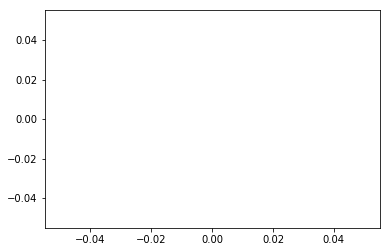

[]


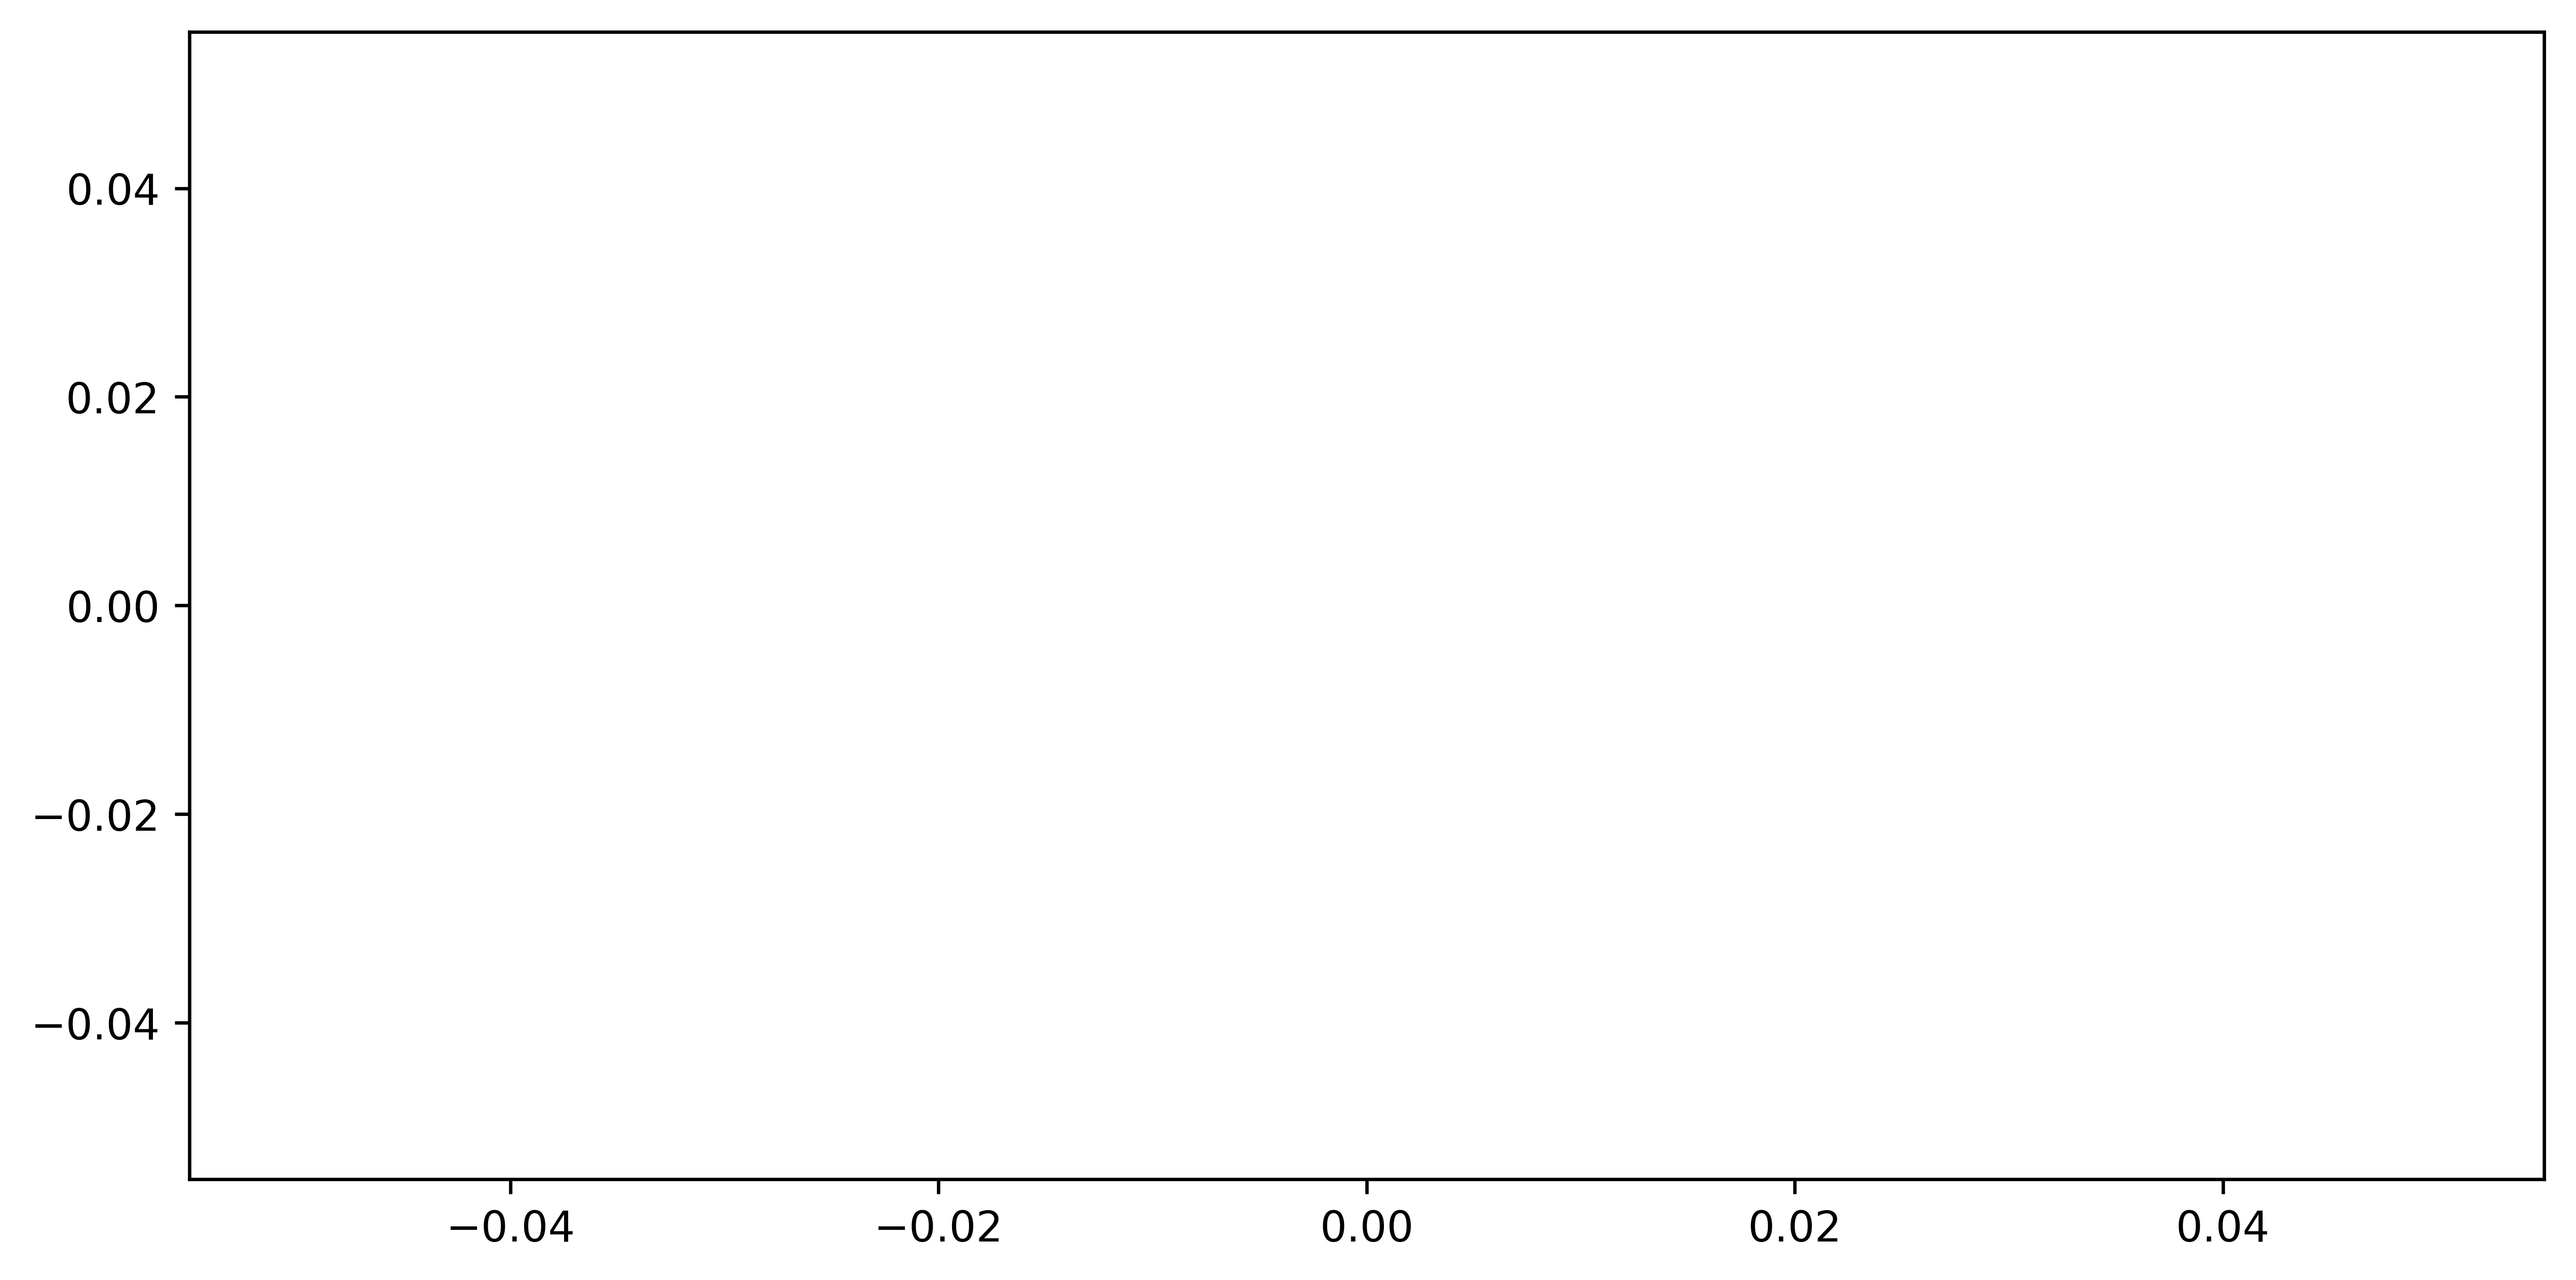

In [5]:
#for k in range(2, 20) : 
inspect(10, 100)